<a href="https://colab.research.google.com/github/Jay06eng/Machine-Learning/blob/main/Lab_6_Python_%2B_SQL_Mini_Project_Jay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PART 1

1. Import the libraries

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

2. Import the csv file 'Survey.csv' into df

In [ ]:
df = pd.read_csv('survey_clean_set.csv')
df

,Date,Timestamp,Age,Gender,Bulacan_resident,extended_family_cohabitation,household_occupants,students_house_members_1,students_house_members_2,amount_finacial_contributors,...,monthly_elect_budget,appliances,electronics_usage,elec_bill_struggle_rate,elec_bill_delinquency_rate,Month A,Month B,Month C,How much?,frequency
0,5/11/2022,8:37:38 PM,21.0,Male,Yes,No,5.0,Yes,2,2.0,...,1000.0,TV;Refrigerator;Washing Machine,Laptop;Smart Phone,Sometimes,Sometimes,1000.0,1504,1252,Higher than Php3000,Monthly
1,5/11/2022,8:37:55 PM,20.0,Male,Yes,No,3.0,Yes,2,3.0,...,3000.0,Air Conditioner;Desktop Computer;Rice Cooker,Laptop;Desktop Computer;Smart Phone,Never,Never,2500.0,3004,2752,NaN,NaN
2,5/11/2022,8:40:50 PM,21.0,Male,Yes,No,5.0,Yes,2,3.0,...,5500.0,TV;Refrigerator;Washing Machine;Desktop Computer,Laptop;Desktop Computer;Smart Phone,Very Often,Sometimes,5000.0,5504,5252,Higher than Php3000,Yearly
3,5/11/2022,8:44:20 PM,20.0,Male,Yes,No,6.0,Yes,4,2.0,...,2000.0,TV;Refrigerator;Washing Machine,Laptop;Smart Phone,Sometimes,Never,1000.0,1504,1252,Php1000-Php1999,Occasionally ( Not regularly)
4,5/11/2022,8:57:26 PM,20.0,Female,Yes,No,4.0,Yes,2,2.0,...,3000.0,Air Conditioner;TV;Refrigerator;Washing Machin...,Laptop;Tablet;Smart Phone,Sometimes,Never,2800.0,3304,3052,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,5/16/2022,1:11:06 PM,22.0,Female,Yes,Yes,6.0,Yes,2,3.0,...,3000.0,Air Conditioner;TV;Refrigerator;Washing Machin...,Laptop;Tablet;Smart Phone,Never,Never,2500.0,3004,2752,Higher than Php3000,Monthly
112,5/16/2022,6:48:32 PM,19.0,Male,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,504,252,NaN,NaN
113,5/11/2022,10:41:55 PM,151.0,Female,Yes,Yes,7.0,Yes,2,4.0,...,1000.0,TV;Refrigerator;Washing Machine;Rice Cooker;El...,Laptop;Smart Phone,Sometimes,Sometimes,800.0,1304,1052,NaN,NaN
114,5/12/2022,9:41:53 AM,2.0,Female,Yes,No,7.0,Yes,2,2.0,...,2000.0,TV;Refrigerator;Desktop Computer,Laptop;Desktop Computer;Tablet;Smart Phone,Sometimes,Sometimes,1634.0,2138,1886,NaN,NaN


3. Connect to a database, name the database 'Survey_Database.db'

In [ ]:
conn = sqlite3.connect('Survey_Database.db')
cursor = conn.cursor()

4. Add your dataframe to the database. Name the table 'Initial_Table'

In [ ]:
df.to_sql('Initial_Table', conn, if_exists = 'replace', index = False)

116

5. Check column names

In [ ]:
pd.read_sql_query('PRAGMA table_info("Initial_Table")', conn,)

,cid,name,type,notnull,dflt_value,pk
0,0,Date,TEXT,0,None,0
1,1,Timestamp,TEXT,0,None,0
2,2,Age,REAL,0,None,0
3,3,Gender,TEXT,0,None,0
4,4,Bulacan_resident,TEXT,0,None,0
5,5,extended_family_cohabitation,TEXT,0,None,0
6,6,household_occupants,REAL,0,None,0
7,7,students_house_members_1,TEXT,0,None,0
8,8,students_house_members_2,TEXT,0,None,0
9,9,amount_finacial_contributors,REAL,0,None,0


6. Query: Make a table 'Initial_Table2' without the columns, timestamp, name, mobile number.

In [ ]:
cursor.execute('''
    CREATE TABLE Initial_Table2 AS
    SELECT
        Date, Age, Gender, Bulacan_resident, extended_family_cohabitation,
        household_occupants, students_house_members_1, students_house_members_2,
        amount_finacial_contributors, monthly_accumul_salary, occasional_financial_assistance,
        monthly_elect_budget, appliances, electronics_usage, elec_bill_struggle_rate,
        elec_bill_delinquency_rate, "Month A", "Month B", "Month C", "How much?", frequency
    FROM Initial_Table
''')
conn.commit()

7. Query: Only retrieve data of respondents from Bulacan.

In [ ]:
cursor.execute('''
    SELECT *
    FROM Initial_Table2
    WHERE Bulacan_resident = 'Yes'
''')
conn.commit()

ProgrammingError: Cannot operate on a closed database.

In [ ]:
pd.read_sql_query('PRAGMA table_info("Initial_Table2")',conn,)

,cid,name,type,notnull,dflt_value,pk
0,0,Date,TEXT,0,None,0
1,1,Age,REAL,0,None,0
2,2,Gender,TEXT,0,None,0
3,3,Bulacan_resident,TEXT,0,None,0
4,4,extended_family_cohabitation,TEXT,0,None,0
5,5,household_occupants,REAL,0,None,0
6,6,students_house_members_1,TEXT,0,None,0
7,7,students_house_members_2,TEXT,0,None,0
8,8,amount_finacial_contributors,REAL,0,None,0
9,9,monthly_accumul_salary,TEXT,0,None,0


8. Make a table from the query in item 7, call it 'Main_Table'

In [ ]:
cursor.execute("DROP TABLE IF EXISTS Main_Table;")
cursor.execute("""
    CREATE TABLE Main_Table AS
    SELECT *
    FROM Initial_Table2
    WHERE Bulacan_resident = 'Yes'
""")
conn.commit()

9. Query: Retrieve responses with students in household

In [ ]:
cursor.execute('''
SELECT *
FROM Main_Table
WHERE students_house_members_1 = 'Yes' OR students_house_members_2 > 0
''')

In [ ]:
pd.read_sql_query("SELECT * FROM Main_Table LIMIT 5;", conn)

,Date,Age,Gender,Bulacan_resident,extended_family_cohabitation,household_occupants,students_house_members_1,students_house_members_2,amount_finacial_contributors,monthly_accumul_salary,...,monthly_elect_budget,appliances,electronics_usage,elec_bill_struggle_rate,elec_bill_delinquency_rate,Month A,Month B,Month C,How much?,frequency
0,5/11/2022,21.0,Male,Yes,No,5.0,Yes,2,2.0,"Between Php 21,194 and Php 43, 828",...,1000.0,TV;Refrigerator;Washing Machine,Laptop;Smart Phone,Sometimes,Sometimes,1000.0,1504,1252,Higher than Php3000,Monthly
1,5/11/2022,20.0,Male,Yes,No,3.0,Yes,2,3.0,"Between Php 21,194 and Php 43, 828",...,3000.0,Air Conditioner;Desktop Computer;Rice Cooker,Laptop;Desktop Computer;Smart Phone,Never,Never,2500.0,3004,2752,None,None
2,5/11/2022,21.0,Male,Yes,No,5.0,Yes,2,3.0,"Less than Php 21,194",...,5500.0,TV;Refrigerator;Washing Machine;Desktop Computer,Laptop;Desktop Computer;Smart Phone,Very Often,Sometimes,5000.0,5504,5252,Higher than Php3000,Yearly
3,5/11/2022,20.0,Male,Yes,No,6.0,Yes,4,2.0,"Less than Php 21,194",...,2000.0,TV;Refrigerator;Washing Machine,Laptop;Smart Phone,Sometimes,Never,1000.0,1504,1252,Php1000-Php1999,Occasionally ( Not regularly)
4,5/11/2022,20.0,Female,Yes,No,4.0,Yes,2,2.0,"Less than Php 21,194",...,3000.0,Air Conditioner;TV;Refrigerator;Washing Machin...,Laptop;Tablet;Smart Phone,Sometimes,Never,2800.0,3304,3052,None,None


In [ ]:
pd.read_sql_query("PRAGMA table_info('Main_Table');", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,Date,TEXT,0,None,0
1,1,Age,REAL,0,None,0
2,2,Gender,TEXT,0,None,0
3,3,Bulacan_resident,TEXT,0,None,0
4,4,extended_family_cohabitation,TEXT,0,None,0
5,5,household_occupants,REAL,0,None,0
6,6,students_house_members_1,TEXT,0,None,0
7,7,students_house_members_2,TEXT,0,None,0
8,8,amount_finacial_contributors,REAL,0,None,0
9,9,monthly_accumul_salary,TEXT,0,None,0


In [ ]:
pd.read_sql_query('SELECT name FROM sqlite_master WHERE type="table"; ', conn)

,name
0,Initial_Table
1,Initial_Table2
2,Main_Table


10. Make a table from the Query in item 9. Call it 'With_Students'

In [ ]:
# 1. Remove old table -I created it and then had to run the cell again-
cursor.execute("DROP TABLE IF EXISTS With_Students;")

# 2. Create the new table using your query
cursor.execute('''
    CREATE TABLE With_Students AS
    SELECT *
    FROM Main_Table
    WHERE students_house_members_1 > 0
       OR students_house_members_2 > 0;
''')

conn.commit()


In [ ]:
pd.read_sql_query("SELECT * FROM With_Students LIMIT 5;", conn)

,Date,Age,Gender,Bulacan_resident,extended_family_cohabitation,household_occupants,students_house_members_1,students_house_members_2,amount_finacial_contributors,monthly_accumul_salary,...,monthly_elect_budget,appliances,electronics_usage,elec_bill_struggle_rate,elec_bill_delinquency_rate,Month A,Month B,Month C,How much?,frequency
0,5/11/2022,21.0,Male,Yes,No,5.0,Yes,2,2.0,"Between Php 21,194 and Php 43, 828",...,1000.0,TV;Refrigerator;Washing Machine,Laptop;Smart Phone,Sometimes,Sometimes,1000.0,1504,1252,Higher than Php3000,Monthly
1,5/11/2022,20.0,Male,Yes,No,3.0,Yes,2,3.0,"Between Php 21,194 and Php 43, 828",...,3000.0,Air Conditioner;Desktop Computer;Rice Cooker,Laptop;Desktop Computer;Smart Phone,Never,Never,2500.0,3004,2752,None,None
2,5/11/2022,21.0,Male,Yes,No,5.0,Yes,2,3.0,"Less than Php 21,194",...,5500.0,TV;Refrigerator;Washing Machine;Desktop Computer,Laptop;Desktop Computer;Smart Phone,Very Often,Sometimes,5000.0,5504,5252,Higher than Php3000,Yearly
3,5/11/2022,20.0,Male,Yes,No,6.0,Yes,4,2.0,"Less than Php 21,194",...,2000.0,TV;Refrigerator;Washing Machine,Laptop;Smart Phone,Sometimes,Never,1000.0,1504,1252,Php1000-Php1999,Occasionally ( Not regularly)
4,5/11/2022,20.0,Female,Yes,No,4.0,Yes,2,2.0,"Less than Php 21,194",...,3000.0,Air Conditioner;TV;Refrigerator;Washing Machin...,Laptop;Tablet;Smart Phone,Sometimes,Never,2800.0,3304,3052,None,None


11. Query: Retrieve responses from table 'With_Students' where students have at least a Laptop or a Desktop COmputer

In [ ]:
pd.read_sql_query("PRAGMA table_info('With_Students');", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,Date,TEXT,0,None,0
1,1,Age,REAL,0,None,0
2,2,Gender,TEXT,0,None,0
3,3,Bulacan_resident,TEXT,0,None,0
4,4,extended_family_cohabitation,TEXT,0,None,0
5,5,household_occupants,REAL,0,None,0
6,6,students_house_members_1,TEXT,0,None,0
7,7,students_house_members_2,TEXT,0,None,0
8,8,amount_finacial_contributors,REAL,0,None,0
9,9,monthly_accumul_salary,TEXT,0,None,0


In [ ]:
query = """
SELECT *
FROM With_Students
WHERE appliances LIKE '%Laptop%'
    OR appliances LIKE '%Desktop%'
    OR electronics_usage LIKE '%Laptop%'
    OR electronics_usage LIKE '%Desktop%';
"""

pd.read_sql_query(query, conn)


,Date,Age,Gender,Bulacan_resident,extended_family_cohabitation,household_occupants,students_house_members_1,students_house_members_2,amount_finacial_contributors,monthly_accumul_salary,...,monthly_elect_budget,appliances,electronics_usage,elec_bill_struggle_rate,elec_bill_delinquency_rate,Month A,Month B,Month C,How much?,frequency
0,5/11/2022,21.0,Male,Yes,No,5.0,Yes,2,2.0,"Between Php 21,194 and Php 43, 828",...,1000.0,TV;Refrigerator;Washing Machine,Laptop;Smart Phone,Sometimes,Sometimes,1000.0,1504,1252,Higher than Php3000,Monthly
1,5/11/2022,20.0,Male,Yes,No,3.0,Yes,2,3.0,"Between Php 21,194 and Php 43, 828",...,3000.0,Air Conditioner;Desktop Computer;Rice Cooker,Laptop;Desktop Computer;Smart Phone,Never,Never,2500.0,3004,2752,None,None
2,5/11/2022,21.0,Male,Yes,No,5.0,Yes,2,3.0,"Less than Php 21,194",...,5500.0,TV;Refrigerator;Washing Machine;Desktop Computer,Laptop;Desktop Computer;Smart Phone,Very Often,Sometimes,5000.0,5504,5252,Higher than Php3000,Yearly
3,5/11/2022,20.0,Male,Yes,No,6.0,Yes,4,2.0,"Less than Php 21,194",...,2000.0,TV;Refrigerator;Washing Machine,Laptop;Smart Phone,Sometimes,Never,1000.0,1504,1252,Php1000-Php1999,Occasionally ( Not regularly)
4,5/11/2022,20.0,Female,Yes,No,4.0,Yes,2,2.0,"Less than Php 21,194",...,3000.0,Air Conditioner;TV;Refrigerator;Washing Machin...,Laptop;Tablet;Smart Phone,Sometimes,Never,2800.0,3304,3052,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,5/16/2022,22.0,Female,Yes,Yes,3.0,Yes,2,1.0,"Less than Php 21,194",...,1500.0,Air Conditioner;TV;Refrigerator;Washing Machin...,Laptop;Desktop Computer;Smart Phone,Often,Sometimes,1500.0,2004,1752,None,None
92,5/16/2022,22.0,Female,Yes,Yes,6.0,Yes,2,3.0,"Between Php 21,194 and Php 43, 828",...,3000.0,Air Conditioner;TV;Refrigerator;Washing Machin...,Laptop;Tablet;Smart Phone,Never,Never,2500.0,3004,2752,Higher than Php3000,Monthly
93,5/11/2022,151.0,Female,Yes,Yes,7.0,Yes,2,4.0,"Less than Php 21,194",...,1000.0,TV;Refrigerator;Washing Machine;Rice Cooker;El...,Laptop;Smart Phone,Sometimes,Sometimes,800.0,1304,1052,None,None
94,5/12/2022,2.0,Female,Yes,No,7.0,Yes,2,2.0,"Less than Php 21,194",...,2000.0,TV;Refrigerator;Desktop Computer,Laptop;Desktop Computer;Tablet;Smart Phone,Sometimes,Sometimes,1634.0,2138,1886,None,None


12. Show the existing tables in the current database.

In [ ]:
pd.read_sql_query('SELECT name FROM sqlite_master WHERE type="table"; ', conn)

,name
0,Initial_Table
1,Initial_Table2
2,Main_Table
3,With_Students


13. Close the connection

In [ ]:
conn.commit()
conn.close()

14. Call the database again, verify if we have the new tables.

In [ ]:
conn = sqlite3.connect('Survey_Database.db')
pd.read_sql_query('SELECT name FROM sqlite_master WHERE type="table";', conn)

,name
0,Initial_Table
1,Initial_Table2
2,Main_Table
3,With_Students


15. Drop both of the Initial Tables

In [ ]:
cursor = conn.cursor()
cursor.execute("DROP TABLE IF EXISTS Initial_Table")
cursor.execute("DROP TABLE IF EXISTS Initial_Table2")

#PART 2

## OUR CONCLUSION SHOUD REVOLVE AROUND THE LOW INCOME HOUSEHOLDS EARNING LESS THAN PHP 21,194.

###1. FILTERING QUALIFIED RESPONDENTS

a. Query_Sample: Only retrieve respondents who belongs to the low income households. Use Main_Table

In [ ]:
query_sample = """
SELECT *
FROM Main_Table
WHERE monthly_accumul_salary = 'Less than Php 21,194'
    AND monthly_accumul_salary !='Between Php 21,194 and Php 43,828' ;
"""

pd.read_sql_query(query_sample, conn)


ProgrammingError: Cannot operate on a closed database.

b. Make a table and call it 'sample' <br><br>
*--- > a "sample" refers to a subset of individuals or elements from a larger population that is selected for study.*

In [ ]:
# Remove old table if exists
cursor.execute("DROP TABLE IF EXISTS sample;")

# Create new table using your corrected filter
cursor.execute("""
    CREATE TABLE sample AS
    SELECT *
    FROM Main_Table
    WHERE monthly_accumul_salary = 'Less than Php 21,194' AND monthly_accumul_salary !='Between Php 21,194 and Php 43, 828' ;
""")

conn.commit()



In [ ]:
pd.read_sql_query("SELECT * FROM sample LIMIT 5;", conn)

,Date,Age,Gender,Bulacan_resident,extended_family_cohabitation,household_occupants,students_house_members_1,students_house_members_2,amount_finacial_contributors,monthly_accumul_salary,...,monthly_elect_budget,appliances,electronics_usage,elec_bill_struggle_rate,elec_bill_delinquency_rate,Month A,Month B,Month C,How much?,frequency
0,5/11/2022,21.0,Male,Yes,No,5.0,Yes,2,3.0,"Less than Php 21,194",...,5500.0,TV;Refrigerator;Washing Machine;Desktop Computer,Laptop;Desktop Computer;Smart Phone,Very Often,Sometimes,5000.0,5504,5252,Higher than Php3000,Yearly
1,5/11/2022,20.0,Male,Yes,No,6.0,Yes,4,2.0,"Less than Php 21,194",...,2000.0,TV;Refrigerator;Washing Machine,Laptop;Smart Phone,Sometimes,Never,1000.0,1504,1252,Php1000-Php1999,Occasionally ( Not regularly)
2,5/11/2022,20.0,Female,Yes,No,4.0,Yes,2,2.0,"Less than Php 21,194",...,3000.0,Air Conditioner;TV;Refrigerator;Washing Machin...,Laptop;Tablet;Smart Phone,Sometimes,Never,2800.0,3304,3052,None,None
3,5/11/2022,21.0,Female,Yes,Yes,7.0,Yes,2,4.0,"Less than Php 21,194",...,1000.0,TV;Refrigerator;Washing Machine;Rice Cooker;El...,Laptop;Smart Phone,Sometimes,Sometimes,800.0,1304,1052,None,None
4,5/12/2022,21.0,Female,Yes,No,7.0,Yes,2,2.0,"Less than Php 21,194",...,2000.0,TV;Refrigerator;Desktop Computer,Laptop;Desktop Computer;Tablet;Smart Phone,Sometimes,Sometimes,1634.0,2138,1886,None,None


###2. Average Bill

a. Query_avg_bill: Add a column in sample, call it "avg_bill" and get the average of month a, month b, month c columns. Retrieve ALL information including the new column.

In [ ]:
query_avg_bill = """
SELECT
    *,
    (("Month A" + "Month B" + "Month C") / 3.0) AS avg_bill
FROM sample;
"""

pd.read_sql_query(query_avg_bill, conn)


,Date,Age,Gender,Bulacan_resident,extended_family_cohabitation,household_occupants,students_house_members_1,students_house_members_2,amount_finacial_contributors,monthly_accumul_salary,...,appliances,electronics_usage,elec_bill_struggle_rate,elec_bill_delinquency_rate,Month A,Month B,Month C,How much?,frequency,avg_bill
0,5/11/2022,21.0,Male,Yes,No,5.0,Yes,2,3.0,"Less than Php 21,194",...,TV;Refrigerator;Washing Machine;Desktop Computer,Laptop;Desktop Computer;Smart Phone,Very Often,Sometimes,5000.0,5504,5252,Higher than Php3000,Yearly,5252.0
1,5/11/2022,20.0,Male,Yes,No,6.0,Yes,4,2.0,"Less than Php 21,194",...,TV;Refrigerator;Washing Machine,Laptop;Smart Phone,Sometimes,Never,1000.0,1504,1252,Php1000-Php1999,Occasionally ( Not regularly),1252.0
2,5/11/2022,20.0,Female,Yes,No,4.0,Yes,2,2.0,"Less than Php 21,194",...,Air Conditioner;TV;Refrigerator;Washing Machin...,Laptop;Tablet;Smart Phone,Sometimes,Never,2800.0,3304,3052,None,None,3052.0
3,5/11/2022,21.0,Female,Yes,Yes,7.0,Yes,2,4.0,"Less than Php 21,194",...,TV;Refrigerator;Washing Machine;Rice Cooker;El...,Laptop;Smart Phone,Sometimes,Sometimes,800.0,1304,1052,None,None,1052.0
4,5/12/2022,21.0,Female,Yes,No,7.0,Yes,2,2.0,"Less than Php 21,194",...,TV;Refrigerator;Desktop Computer,Laptop;Desktop Computer;Tablet;Smart Phone,Sometimes,Sometimes,1634.0,2138,1886,None,None,1886.0
5,5/12/2022,18.0,Male,Yes,No,3.0,Yes,1,2.0,"Less than Php 21,194",...,TV;Washing Machine;Rice Cooker,Laptop;Smart Phone,Sometimes,Sometimes,200.0,704,452,None,None,452.0
6,5/12/2022,21.0,Female,Yes,Yes,7.0,Yes,1,2.0,"Less than Php 21,194",...,Air Conditioner;TV;Washing Machine,Laptop;Smart Phone,Always,Sometimes,5200.0,5704,5452,Php1000-Php1999,Occasionally ( Not regularly),5452.0
7,5/12/2022,18.0,Male,Yes,Yes,6.0,Yes,1,3.0,"Less than Php 21,194",...,Air Conditioner;TV;Refrigerator;Washing Machin...,Desktop Computer;Smart Phone,Sometimes,Never,5000.0,5504,5252,None,None,5252.0
8,5/12/2022,21.0,Male,Yes,No,6.0,Yes,2,2.0,"Less than Php 21,194",...,TV;Refrigerator;Washing Machine;Desktop Comput...,Desktop Computer,Sometimes,Sometimes,1800.0,2304,2052,None,None,2052.0
9,5/12/2022,21.0,Male,Yes,Yes,7.0,Yes,3,1.0,"Less than Php 21,194",...,TV;Refrigerator;Washing Machine;Desktop Comput...,Desktop Computer;Smart Phone,Sometimes,Sometimes,2000.0,2504,2252,Higher than Php3000,Yearly,2252.0


b. Store the information we retrieved to our updated table, call it 'final_sample'

In [ ]:
# Remove old table if exists
cursor.execute("DROP TABLE IF EXISTS final_sample;")

# Create the updated table with avg_bill included
cursor.execute("""
    CREATE TABLE final_sample AS
    SELECT
        *,
        (("Month A" + "Month B" + "Month C") / 3.0) AS avg_bill
    FROM sample;
""")

conn.commit()


c. We can now drop columns Month A, Month B, and Month C.

In [ ]:
conn.execute("ALTER TABLE final_sample DROP COLUMN 'Month A';")
conn.execute("ALTER TABLE final_sample DROP COLUMN 'Month B';")
conn.execute("ALTER TABLE final_sample DROP COLUMN 'Month C';")
conn.commit()

d. final_sample: Retrieve all the information in final_sample to verify the column drops.

In [ ]:
pd.read_sql_query("PRAGMA table_info('final_sample');", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,Date,TEXT,0,None,0
1,1,Age,REAL,0,None,0
2,2,Gender,TEXT,0,None,0
3,3,Bulacan_resident,TEXT,0,None,0
4,4,extended_family_cohabitation,TEXT,0,None,0
5,5,household_occupants,REAL,0,None,0
6,6,students_house_members_1,TEXT,0,None,0
7,7,students_house_members_2,TEXT,0,None,0
8,8,amount_finacial_contributors,REAL,0,None,0
9,9,monthly_accumul_salary,TEXT,0,None,0


##Deriving Conclusions from final_sample

FIRST!! close the connection, we will use python for the rest of the conclusions.

In [ ]:
conn.close()

ANSWER THE FOLLOWING QUESTIONS: <br>
use python through 'final_sample' dataframe we made a while ago

###3. Extended family

a. How many low income households live with extended family?

final_sample DataFrame already contains:

1. only low-income households
2. all cleaned columns
3. extended_family_cohabitation column, which tells you if they live with extended family


I need to count how many rows say “Yes” in the extended_family_cohabitation column.

That gives you the number of low-income households living with extended family.

In [ ]:
import sqlite3
import pandas as pd


In [ ]:
conn = sqlite3.connect("Survey_Database.db")

In [ ]:
final_sample = pd.read_sql_query("SELECT * FROM final_sample;", conn)

In [ ]:
count_extended = final_sample[final_sample['extended_family_cohabitation'] == 'Yes'].shape[0]
count_extended

23

b. Make a pie chart showing the difference between the households living with extended family and those who do not. (ONLY PYTHON)

In [ ]:
counts = final_sample['extended_family_cohabitation'].value_counts()
counts

,count
extended_family_cohabitation,
No,35
Yes,23


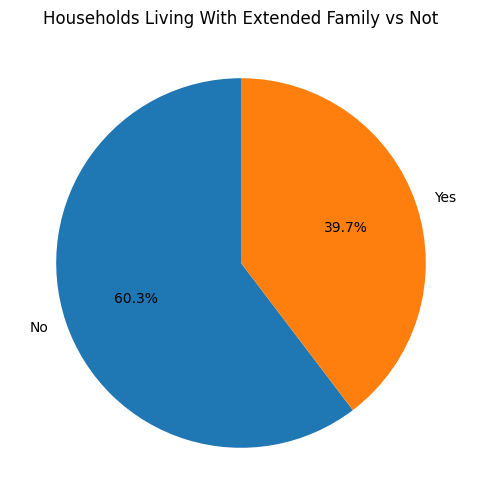

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Households Living With Extended Family vs Not")
plt.show()


###4. Students at home

a. How many households have students?

In [ ]:
# Count households with at least 1 student
num_with_students = final_sample[
    (final_sample['students_house_members_1'] == 'Yes')

].shape[0]

num_with_students
print(f'The amount of housesholds with students is {num_with_students} ')

The amount of housesholds with students is 57 


b. Make a pie chart from it.

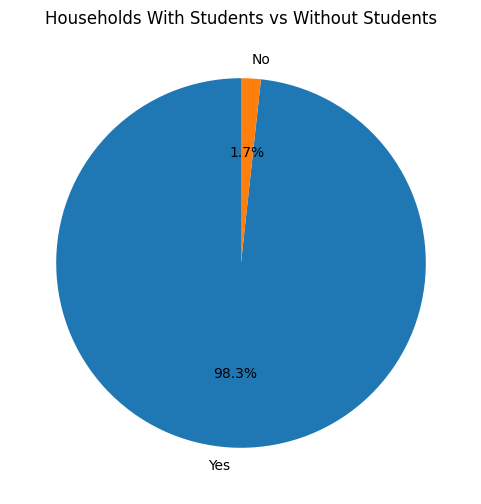

In [ ]:
# Count how many households have at least 1 student
counts = final_sample['students_house_members_1'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Households With Students vs Without Students")
plt.show()


###5. AVERAGE BILL / AVERAGE BUDGET

a. How much is the average bill of the low income households? call the variable 'avg_bill_household'

In [ ]:
avg_bill_household = final_sample['avg_bill'].mean()
avg_bill_household


print(f'The average bill amount of low income households is {avg_bill_household: .2f}')



The average bill amount of low income households is  3498.95


b. How much is the average budget of the low income households? Call the variable 'avg_budget_household'.

In [ ]:
avg_budget_household = final_sample['monthly_elect_budget'].mean()

print(f"The average budget of low income households is {avg_budget_household:.2f}")


The average budget of low income households is 2327.09


In [ ]:
#quick count to check how many default elec bill payment
final_sample['elec_bill_delinquency_rate'].value_counts()

,count
elec_bill_delinquency_rate,
Sometimes,31
Never,12
Often,9
Very Often,4
Always,2


c. Based on the numbers, what can you conclude?

*ANSWER* HERE:

1. Low income households are spending more on than they have budgeted. Average bill is higher **Php 3 498.95** and the average budget is **Php 2 327.09**
2. Households are consistenly overspending
3. 100% of low income households struggle to pay their electicity bill and only 20% have never failed to pay the bill

###6. AVERAGE BILL with students

a. What is the average bill of households with students at home? Use .groupby

```
# sample code from previous lecture

df[['Education',"Income"]].groupby("Education").mean()
```



In [ ]:
final_sample['has_students'] = (
    (final_sample['students_house_members_1'] == 'Yes')
)
final_sample['has_students'].shape

(58,)

In [ ]:
avg_bill_with_students = (
    final_sample[['has_students', 'avg_bill']]
    .groupby('has_students')
    .mean()
)

avg_bill_with_students
print(f"The average bill of households with students is {avg_bill_with_students.iloc[1, 0]:.2f}")

The average bill of households with students is 3538.37


In [ ]:
counts_students_yes = final_sample['has_students'].value_counts()
counts

#That No=1 is one cell value that is not
#either a Yes/No, they answered 'None'

,count
students_house_members_1,
Yes,57
No,1


b. What can you conclude from the information above? Note: This is a trick question.

ANSWER HERE: We don't have the information containing the "other side of the story" as we only have the data for households with students. Having the data from the households with no students would allow for a comprehensive analysis.

With current information conclusions are within the limits of the households with students.

###7. Struggle to find money.

a. How many households struggle to pay the bill always, very often, often, sometimes, and never?



```
.value_counts()
```



In [ ]:
#quick count to check how many struggle to pay elec bills
struggle_counts = final_sample['elec_bill_struggle_rate'].value_counts()
struggle_percent = final_sample['elec_bill_struggle_rate'].value_counts(normalize=True) * 100

result = pd.DataFrame({
    'count': struggle_counts,
    'percent': struggle_percent.round(2)
})

result

,count,percent
elec_bill_struggle_rate,,
Sometimes,26,44.83
Always,11,18.97
Often,10,17.24
Very Often,8,13.79
Never,3,5.17


b. Make a bar chart

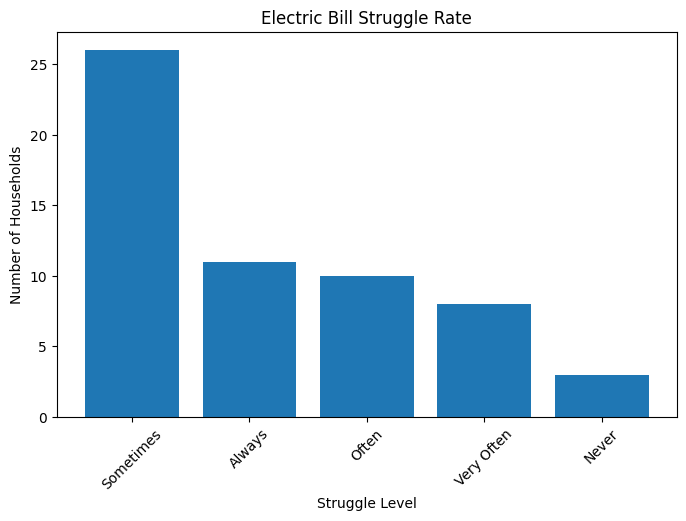

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.bar(struggle_counts.index, struggle_counts.values)

plt.title("Electric Bill Struggle Rate")
plt.xlabel("Struggle Level")
plt.ylabel("Number of Households")
plt.xticks(rotation=45)

plt.show()


###8. Fail to pay the bill

a. How many households struggle to pay the bill always, very often, often, sometimes, and never?



```
.value_counts()
```


In [ ]:
from matplotlib.cbook import delete_masked_points
#quick count to check how many struggle to pay elec bills
delinquency_counts = final_sample['elec_bill_delinquency_rate'].value_counts()
delinquency_percent = final_sample['elec_bill_delinquency_rate'].value_counts(normalize=True) * 100

result2 = pd.DataFrame({
    'count': delinquency_counts,
    'percent': delinquency_percent.round(2)
})

result2

,count,percent
elec_bill_delinquency_rate,,
Sometimes,31,53.45
Never,12,20.69
Often,9,15.52
Very Often,4,6.90
Always,2,3.45


b. Make a bar chart

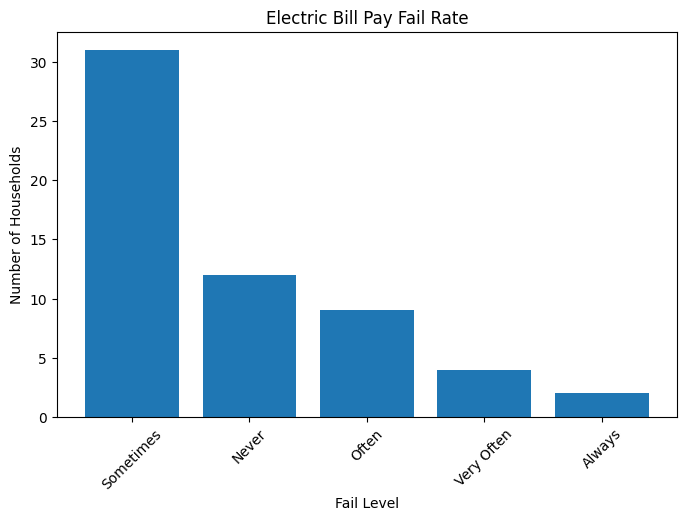

In [ ]:
plt.figure(figsize=(8, 5))

plt.bar(delinquency_counts.index, delinquency_counts.values)

plt.title("Electric Bill Pay Fail Rate")
plt.xlabel("Fail Level")
plt.ylabel("Number of Households")
plt.xticks(rotation=45)

plt.show()

###9. You now may use SQL, or Python, whichever is more comfortable.

if you will use SQL, make sure to reconnect to the database THAT IS already in our directory. Careful with the spelling.


a. Count how many households have each of the essential appliances.

1. TV
2. Refrigerator
3. Rice Cooker
4. Washing Machine

<br>

also count how many households got the luxury of having these appliances.

1. Electric Water Dispenser
2. Air Conditioner

In [ ]:
#list = [ 'TV', 'Refrigerator', 'Rice Cooker', 'Washing Machine']
#in appliances column

# Count households that have each appliance
tv_count = final_sample['appliances'].str.contains('TV', case=False, na=False).sum()
ref_count = final_sample['appliances'].str.contains('Refrigerator', case=False, na=False).sum()
rice_count = final_sample['appliances'].str.contains('Rice Cooker', case=False, na=False).sum()
wash_count = final_sample['appliances'].str.contains('Washing Machine', case=False, na=False).sum()

tv_count, ref_count, rice_count, wash_count


(np.int64(55), np.int64(42), np.int64(33), np.int64(51))

In [ ]:
print(f"Households with TV: {tv_count}")
print(f"Households with Refrigerator: {ref_count}")
print(f"Households with Rice Cooker: {rice_count}")
print(f"Households with Washing Machine: {wash_count}")




Households with TV: 55
Households with Refrigerator: 42
Households with Rice Cooker: 33
Households with Washing Machine: 51


In [ ]:
#Another way to do it with dataframes

appliance_counts = pd.DataFrame({
    'appliance': ['TV', 'Refrigerator', 'Rice Cooker', 'Washing Machine'],
    'count': [tv_count, ref_count, rice_count, wash_count]
})

appliance_counts




,appliance,count
0,TV,55
1,Refrigerator,42
2,Rice Cooker,33
3,Washing Machine,51


###10. Remember the With_Students table? Now get the number of the students in low income households who has at least a laptop or desktop computer.

In [ ]:
#load my database

#With_Students = pd.read_sql_query("SELECT * FROM With_Students;", conn)

In [ ]:
#import sqlite3
#import pandas as pd

conn = sqlite3.connect("Survey_Database.db")
With_Students = pd.read_sql_query("SELECT * FROM With_Students;", conn)

#create variable with a function containing code to select from
#both columns to potentially find laptops or desktops
has_computer = (
    With_Students['appliances'].str.contains('Laptop|Desktop', case=False, na=False) |
    With_Students['electronics_usage'].str.contains('Laptop|Desktop', case=False, na=False)
)
num_students_with_computer = has_computer.sum()
num_students_with_computer

print(f'The number of students in low income households who have at least a laptop or desktop is {num_students_with_computer}')

conn.close()

The number of students in low income households who have at least a laptop or desktop is 96


In [ ]:
conn.close()